In [35]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [36]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
DATA_DIR = os.path.join(BASE_DIR, 'feature_eng', 'data', 'ft_df.csv')
#FT_DIR = os.path.join(BASE_DIR, 'get_data', 'data')

df = pd.read_csv(os.path.join(DATA_DIR))
df.tail()

,season,rodada,date,match_name,home_team,away_team,winner,home_score,away_score,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
8247,2008,22,2008-08-23,Figueirense FC - EC Vitória,Figueirense FC,EC Vitória,1,1,2,0,3,17,13.0,3.0,28,1.333333,0.997307,26,8.666667,0.773551,39,8.333333,2.076757,7,7,7,0,1,0,10,-33.0,3.0,33,1.333333,0.940871,31,10.333333,0.927017,23,5.000000,0.785807,10,3,8,0,0,1,AWAY_TEAM
8248,2008,24,2008-09-03,Figueirense FC - Flamengo,Figueirense FC,Flamengo,1,2,3,0,3,17,13.0,4.0,28,0.000000,0.249327,27,9.000000,0.443388,43,9.000000,2.019189,7,7,9,0,3,0,5,4.0,3.0,37,1.666667,1.284778,37,12.333333,1.682233,25,8.666667,1.553689,10,7,6,0,0,2,AWAY_TEAM
8249,2008,26,2008-09-21,Figueirense FC - Cruzeiro,Figueirense FC,Cruzeiro,1,3,4,0,3,17,13.0,7.0,28,0.000000,0.062332,29,9.666667,0.610847,51,10.000000,3.754797,7,7,11,0,5,0,3,5.0,7.0,43,1.333333,0.944149,38,12.666667,0.931318,26,8.000000,1.067338,13,4,8,0,1,0,AWAY_TEAM
8250,2008,36,2008-11-20,Figueirense FC - Náutico,Figueirense FC,Náutico,2,4,3,3,0,17,13.0,4.0,35,0.000000,0.099670,39,13.000000,0.597276,68,14.666667,2.312261,8,11,16,0,3,0,16,15.0,5.0,40,2.333333,2.238732,39,13.000000,2.753156,49,11.333333,1.143404,10,10,15,1,0,0,AWAY_TEAM
8251,2008,37,2008-11-30,Ipatinga FC - Grêmio,Ipatinga FC,Grêmio,1,1,4,0,3,20,-33.0,7.0,34,1.000000,0.949155,35,11.666667,0.888483,62,9.666667,1.629213,9,7,20,0,1,0,2,7.0,7.0,66,2.000000,1.252822,53,17.666667,1.716261,34,12.000000,2.428345,19,9,8,0,1,0,AWAY_TEAM


<Axes: ylabel='count'>

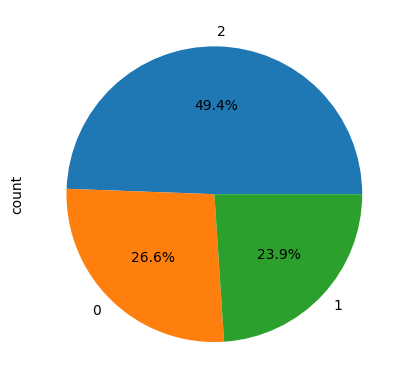

In [37]:
df['winner'].value_counts().plot.pie(autopct='%1.1f%%')


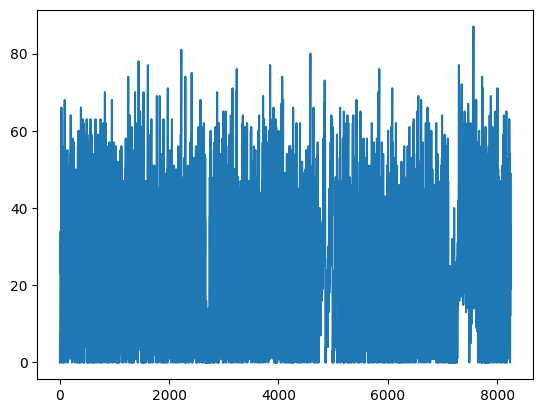

In [3]:
data = df.copy()

import matplotlib.pyplot as plt
plt.plot(data['ht_points'])
plt.show()


In [4]:
import seaborn as sns
sns.pairplot(df, hue="ht_points")
plt.show()


## Algo legal

In [236]:
# Quero um gráfico que mostre o desempenho de todos os times ou de 2 times durante uma temporada
from random import choice

data = df.copy()

data = data[data['season']==2023]

data.sort_values(by='date', inplace=True)

data.rename(columns={'h_match_points':'ht_match_points',
 'a_match_points':'at_match_points'}, inplace=True)

list_times = ['Vasco da Gama', 
              'Flamengo', 
              'Palmeiras',
              'América-MG']

def data_columns(data:pd.DataFrame, prefix:str):
    some_column = data.filter(regex=f'^{prefix}', axis=1).columns
    rename_columns = {column:column.replace(prefix, '') for column in some_column}
    dict_some_dados = {rename_columns[row_column]:row[row_column] for row_column in row[some_column].to_dict()}
    return dict_some_dados

list_jogos = []
for i, row in data.iterrows():
    for team_type in row.index[row.isin(list_times)]:
        if 'home_team' in team_type:
            dict_some_dados = data_columns(data=data, prefix='ht_')
        
        elif 'away_team' in team_type:
            dict_some_dados = data_columns(data=data, prefix='at_')

        else: 
            continue

        dict_dados =  {'data':row['date'],
                        'time':row[team_type], 
                        'rodada':row['rodada'], 
                        'team_type':team_type, 
                        'winner':row['winner']}
        
        dict_dados.update(dict_some_dados)

        list_jogos.append(dict_dados)
        #break

df_only_team_in_row = pd.DataFrame(list_jogos)

df_only_team_in_row.head()

,data,time,rodada,team_type,winner,match_points,rank,ls_rank,days_ls_match,points,l_points,l_wavg_points,goals,l_goals,l_wavg_goals,goals_sf,l_goals_sf,l_wavg_goals_sf,wins,draws,losses,win_streak,loss_streak,draw_streak
0,2023-04-15,Palmeiras,1,home_team,2,3,1,1.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0
1,2023-04-15,América-MG,1,home_team,1,0,20,10.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0
2,2023-04-16,Flamengo,1,home_team,2,3,4,5.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0
3,2023-04-16,Vasco da Gama,1,away_team,1,3,15,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0
4,2023-04-22,América-MG,2,away_team,2,0,20,10.0,7.0,0,0.0,0.0,0,0.0,0.0,3,1.0,3.0,0,0,1,0,1,0


---

In [242]:
import plotly.express as px
#fig = px.scatter(df, x="at_win_streak", y="ht_wins", color="ht_points")
fig = px.line(df_only_team_in_row, x="points", y="rodada", color="rank", )
fig.show()


In [18]:
from bokeh.plotting import figure, output_file, show
p = figure()

data
x = data['at_draws']
y = data['at_rank']

p.line(x, y)
show(p)


In [20]:
import altair as alt
chart = alt.Chart(df).mark_point().encode(
    x='ht_points',
    y='at_wins',
    color='ht_rank'
)
chart.show()


MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.Chart(...)